In [1]:
import lib
from NeuralStates import *
import qutip as qt
import torch.nn as nn 
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def amp_phase(nn_output):
    return nn_output[:, 0] * torch.exp(1.j * 2 * np.pi * nn_output[:, 1])
def bitflip_x(x, N, flips):
    new_x = x
    for _ in range(flips):
        new_x = x ^ (1 << npr.randint(0, N))
    return new_x

In [3]:
num_epochs = 500 + 1
data_rate = 1

In [4]:
N = 20
J = 1

In [5]:
Gamma = 10

In [6]:
num_samples = 150

In [7]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 1)
for epoch in range(num_epochs):
    loss = lib.TFIM_expectation_using_locals(MHNeuralState(N, model, amp_phase, 
                                                           lambda x: bitflip_x(x, N, 1), 2 ** (N - 1), num_samples), 
                                                           N, J, Gamma, model, amp_phase)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % data_rate == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
    if epoch % 50 == 0:
        print(epoch, loss)
print(loss_data[-1])
print(min(loss_data))

0 tensor(-197.9290, grad_fn=<SelectBackward0>)
50 tensor(-200., grad_fn=<SelectBackward0>)
100 tensor(-198.0432, grad_fn=<SelectBackward0>)
150 tensor(-199.8248, grad_fn=<SelectBackward0>)
200 tensor(-202.0966, grad_fn=<SelectBackward0>)
250 tensor(-200.5429, grad_fn=<SelectBackward0>)
300 tensor(-200.9429, grad_fn=<SelectBackward0>)
350 tensor(-198.6939, grad_fn=<SelectBackward0>)
400 tensor(-202.4857, grad_fn=<SelectBackward0>)
450 tensor(-199.5177, grad_fn=<SelectBackward0>)
500 tensor(-201.0294, grad_fn=<SelectBackward0>)
-201.0294189453125
-203.3007049560547


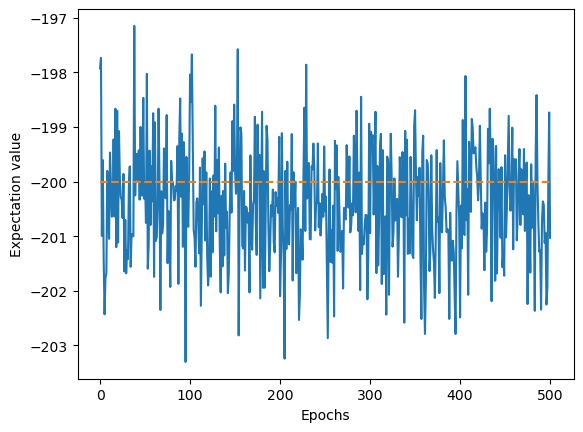

In [8]:
# ground state energy about -10N
plt.plot(epochs, loss_data)
plt.plot([0, 501], [-10 * N] * 2, linestyle = '--')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.show()

In [9]:
Gamma = 0.1

In [10]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 1)
for epoch in range(num_epochs):
    loss = lib.TFIM_expectation_using_locals(MHNeuralState(N, model, amp_phase, 
                                                           lambda x: bitflip_x(x, N, 1), 2 ** (N - 1), num_samples), 
                                                           N, J, Gamma, model, amp_phase)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % data_rate == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
    if epoch % 50 == 0:
        print(epoch, loss)
print(loss_data[-1])
print(min(loss_data))

0 tensor(-1.8474, grad_fn=<SelectBackward0>)
50 tensor(-20.0449, grad_fn=<SelectBackward0>)
100 tensor(-20.0452, grad_fn=<SelectBackward0>)
150 tensor(-20.0455, grad_fn=<SelectBackward0>)
200 tensor(-20.0455, grad_fn=<SelectBackward0>)
250 tensor(-20.0456, grad_fn=<SelectBackward0>)
300 tensor(-20.0456, grad_fn=<SelectBackward0>)
350 tensor(-20.0456, grad_fn=<SelectBackward0>)
400 tensor(-20.0457, grad_fn=<SelectBackward0>)
450 tensor(-20.0457, grad_fn=<SelectBackward0>)
500 tensor(-20.0457, grad_fn=<SelectBackward0>)
-20.045743942260742
-20.045753479003906


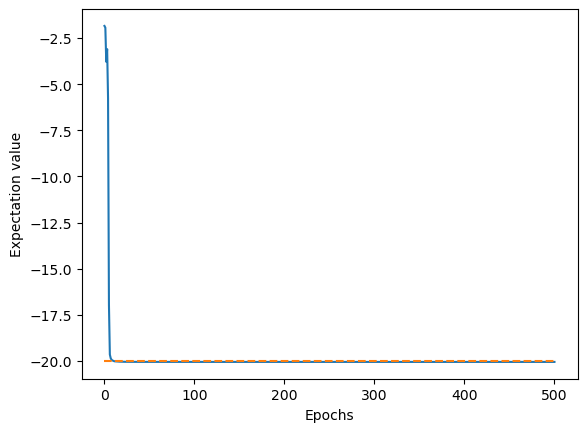

In [11]:
# ground state energy about -N
plt.plot(epochs, loss_data)
plt.plot([0, 501], [-N] * 2, linestyle = '--')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.show()

In [12]:
Gamma = 1

In [13]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 1)
for epoch in range(num_epochs):
    loss = lib.TFIM_expectation_using_locals(MHNeuralState(N, model, amp_phase, 
                                                           lambda x: bitflip_x(x, N, 1), 2 ** (N - 1), num_samples), 
                                                           N, J, Gamma, model, amp_phase)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % data_rate == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
    if epoch % 50 == 0:
        print(epoch, loss)
print(loss_data[-1])
print(min(loss_data))

0 tensor(-20.2062, grad_fn=<SelectBackward0>)
50 tensor(-21.2487, grad_fn=<SelectBackward0>)
100 tensor(-19.9431, grad_fn=<SelectBackward0>)
150 tensor(-20.3971, grad_fn=<SelectBackward0>)
200 tensor(-20.8792, grad_fn=<SelectBackward0>)
250 tensor(-23.6338, grad_fn=<SelectBackward0>)
300 tensor(-20.3687, grad_fn=<SelectBackward0>)
350 tensor(-19.7996, grad_fn=<SelectBackward0>)
400 tensor(-20.0275, grad_fn=<SelectBackward0>)
450 tensor(-18.8613, grad_fn=<SelectBackward0>)
500 tensor(-19.7468, grad_fn=<SelectBackward0>)
-19.746761322021484
-23.75030517578125


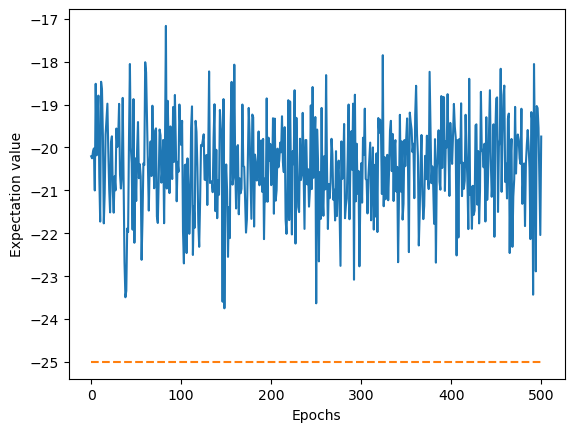

In [14]:
# ground state energy about -1.25 * N
plt.plot(epochs, loss_data)
plt.plot([0, 501], [-1.25 * N] * 2, linestyle = '--')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.show()

In [15]:
num_samples

150

In [16]:
num_samples = 250

In [17]:
model = nn.Sequential(
    nn.Linear(N, 5 * N),
    nn.Sigmoid(),
    nn.Linear(5 * N, 2),
    nn.Sigmoid()
)
epochs = []
loss_data = []
optimizer = torch.optim.SGD(model.parameters(), lr = 1)
for epoch in range(num_epochs):
    loss = lib.TFIM_expectation_using_locals(MHNeuralState(N, model, amp_phase, 
                                                           lambda x: bitflip_x(x, N, 1), 2 ** (N - 1), num_samples), 
                                                           N, J, Gamma, model, amp_phase)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % data_rate == 0:
        loss_data.append(loss.item())
        epochs.append(epoch)
    if epoch % 50 == 0:
        print(epoch, loss)
print(loss_data[-1])
print(min(loss_data))

0 tensor(-20.6365, grad_fn=<SelectBackward0>)
50 tensor(-26.4244, grad_fn=<SelectBackward0>)
100 tensor(-25.9952, grad_fn=<SelectBackward0>)
150 tensor(-25.5585, grad_fn=<SelectBackward0>)
200 tensor(-22.5949, grad_fn=<SelectBackward0>)
250 tensor(-25.1998, grad_fn=<SelectBackward0>)
300 tensor(-25.6215, grad_fn=<SelectBackward0>)
350 tensor(-24.0539, grad_fn=<SelectBackward0>)
400 tensor(-27.4708, grad_fn=<SelectBackward0>)
450 tensor(-25.3111, grad_fn=<SelectBackward0>)
500 tensor(-23.7712, grad_fn=<SelectBackward0>)
-23.771181106567383
-28.27610969543457


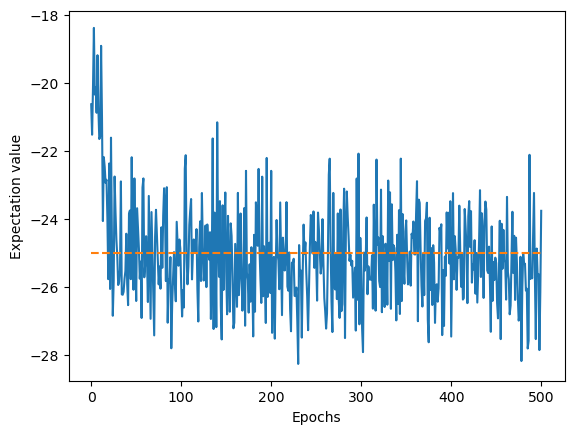

In [18]:
# ground state energy about -1.25 * N
plt.plot(epochs, loss_data)
plt.plot([0, 501], [-1.25 * N] * 2, linestyle = '--')
plt.xlabel('Epochs')
plt.ylabel('Expectation value')
plt.show()